In [1]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import load_img, img_to_array
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define paths for training and validation datasets
train_paths = [
  '/kaggle/input/spcup2025-train-1/Train_1',
    '/kaggle/input/spcup2025-train-2/Train_2',
    '/kaggle/input/spcup2025-train-3/Train_3',
    '/kaggle/input/spcup2025-train-4/Train_4'
]

valid_path = '/kaggle/input/spcup2025-valid-final/valid'  # Validation folder containing valid_real and valid_fake


In [3]:
# Define helper function to load data from a folder
def load_data(folder_path):
    images = []
    labels = []
    for label_folder in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label_folder)
        if not os.path.isdir(label_path):
            continue
        for img_file in os.listdir(label_path):
            images.append(os.path.join(label_path, img_file))
            labels.append(label_folder)
    return pd.DataFrame({'image': images, 'label': labels})

# Initialize data generators
image_size = (128, 128)  # Adjust resolution if needed 
batch_size = 64 

datagen = ImageDataGenerator(rescale=1.0 / 255)

In [4]:
# Define CNN model
def create_model():
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),### see this
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        # third Convolutional Block
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.4),
        # Fourth Convolutional Block
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),
           # Flatten and Fully Connected Layers
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        # Output Layer
        Dense(2, activation='softmax')
    ])
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# Initialize model
model = create_model()

# Model checkpoint
checkpoint_path = "model_checkpoint.keras"
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss', mode='min')


Starting training on folder 1: /kaggle/input/spcup2025-train-1/Train_1
Real images: 42690, Fake images: 49657
Found 69260 validated image filenames belonging to 2 classes.
Found 23087 validated image filenames belonging to 2 classes.
Epoch 1/28
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 726s 655ms/step - accuracy: 0.5861 - loss: 0.8345 - val_accuracy: 0.6100 - val_loss: 0.7546
Epoch 2/28
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 274s 252ms/step - accuracy: 0.6626 - loss: 0.6044 - val_accuracy: 0.6458 - val_loss: 0.6000
Epoch 3/28
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 272s 250ms/step - accuracy: 0.7118 - loss: 0.5414 - val_accuracy: 0.7033 - val_loss: 0.6170
Epoch 4/28
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 268s 246ms/step - accuracy: 0.7482 - loss: 0.4940 - val_accuracy: 0.5003 - val_loss: 1.1450
Epoch 5/28
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 273s 251ms/step - accuracy: 0.7817 - loss: 0.4456 - val_accuracy: 0.6122 - val_loss: 0.7803
Epoch 6/28
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 274s 252ms/step - accuracy: 0.8123 - loss: 0.4013 - v

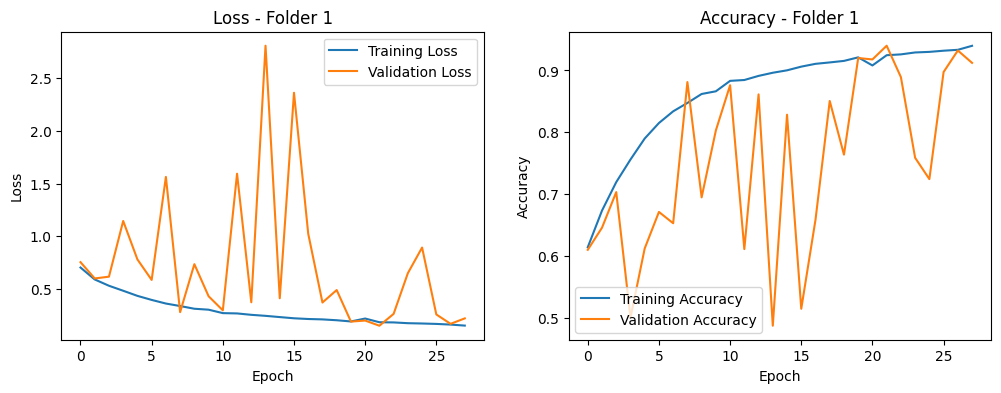

361/361 ━━━━━━━━━━━━━━━━━━━━ 68s 188ms/step


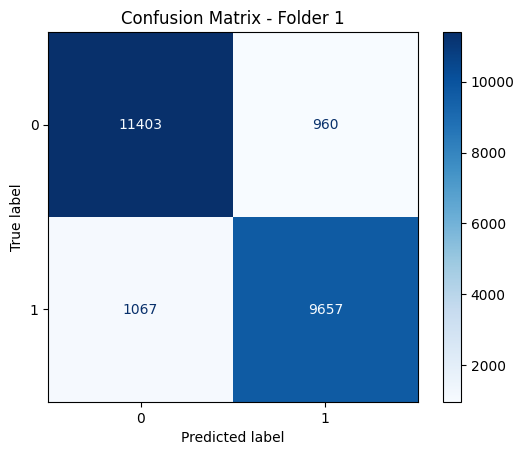

Classification Report - Folder 1:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     12363
           1       0.91      0.90      0.91     10724

    accuracy                           0.91     23087
   macro avg       0.91      0.91      0.91     23087
weighted avg       0.91      0.91      0.91     23087

Overall F1 Score - Folder 1: 0.9122
Overall Precision - Folder 1: 0.9122
Overall Recall - Folder 1: 0.9122


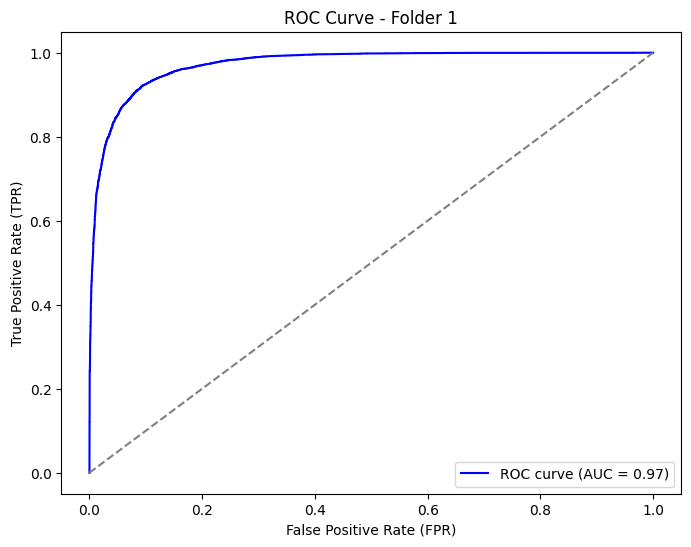

Equal Error Rate (EER) - Folder 1: 0.0872

Starting training on folder 2: /kaggle/input/spcup2025-train-2/Train_2
Real images: 42690, Fake images: 54500
Found 72892 validated image filenames belonging to 2 classes.
Found 24298 validated image filenames belonging to 2 classes.
Epoch 1/28
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 818s 715ms/step - accuracy: 0.9195 - loss: 0.1953 - val_accuracy: 0.9389 - val_loss: 0.1521
Epoch 2/28
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 356s 311ms/step - accuracy: 0.9285 - loss: 0.1761 - val_accuracy: 0.9251 - val_loss: 0.1849
Epoch 3/28
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 292s 255ms/step - accuracy: 0.9285 - loss: 0.1770 - val_accuracy: 0.9392 - val_loss: 0.1479
Epoch 4/28
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 297s 259ms/step - accuracy: 0.9369 - loss: 0.1582 - val_accuracy: 0.8345 - val_loss: 0.4437
Epoch 5/28
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 309s 270ms/step - accuracy: 0.9355 - loss: 0.1617 - val_accuracy: 0.9271 - val_loss: 0.1749
Epoch 6/28
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 293s 256ms/

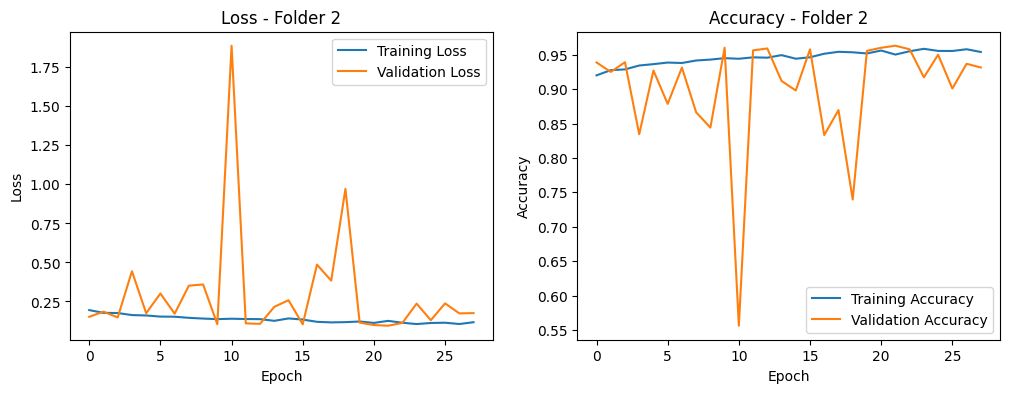

380/380 ━━━━━━━━━━━━━━━━━━━━ 70s 183ms/step


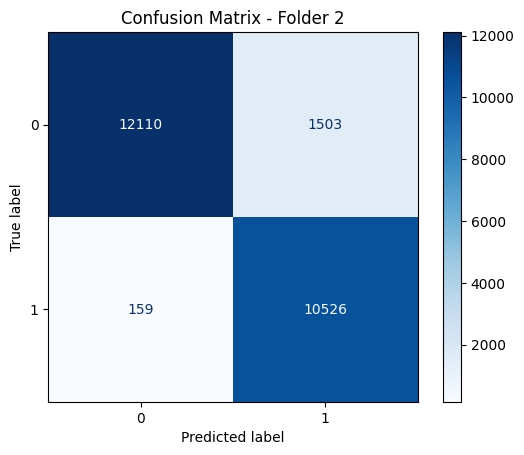

Classification Report - Folder 2:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     13613
           1       0.88      0.99      0.93     10685

    accuracy                           0.93     24298
   macro avg       0.93      0.94      0.93     24298
weighted avg       0.94      0.93      0.93     24298

Overall F1 Score - Folder 2: 0.9318
Overall Precision - Folder 2: 0.9378
Overall Recall - Folder 2: 0.9316


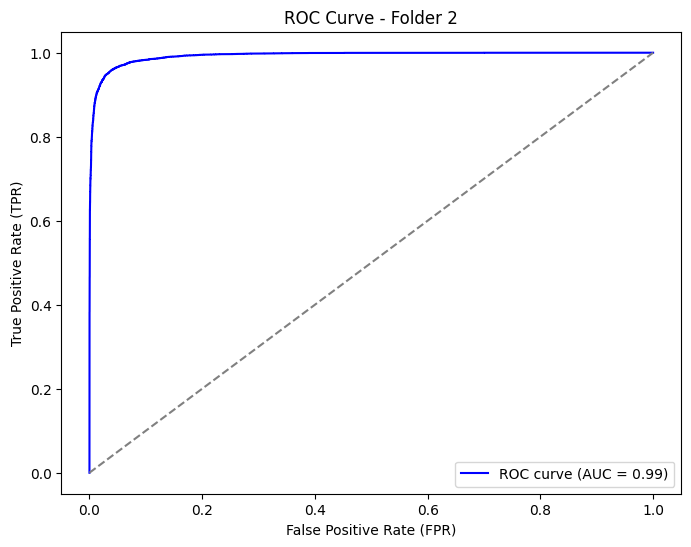

Equal Error Rate (EER) - Folder 2: 0.0405

Starting training on folder 3: /kaggle/input/spcup2025-train-3/Train_3
Real images: 42690, Fake images: 54500
Found 72892 validated image filenames belonging to 2 classes.
Found 24298 validated image filenames belonging to 2 classes.
Epoch 1/28
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 836s 731ms/step - accuracy: 0.9567 - loss: 0.1110 - val_accuracy: 0.7957 - val_loss: 0.7397
Epoch 2/28
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 616s 539ms/step - accuracy: 0.9554 - loss: 0.1167 - val_accuracy: 0.9585 - val_loss: 0.1140
Epoch 3/28
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 324s 283ms/step - accuracy: 0.9562 - loss: 0.1114 - val_accuracy: 0.9713 - val_loss: 0.0783
Epoch 4/28
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 283s 247ms/step - accuracy: 0.9494 - loss: 0.1283 - val_accuracy: 0.9627 - val_loss: 0.1050
Epoch 5/28
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 282s 246ms/step - accuracy: 0.9582 - loss: 0.1062 - val_accuracy: 0.9487 - val_loss: 0.1353
Epoch 6/28
1139/1139 ━━━━━━━━━━━━━━━━━━━━ 296s 259ms/

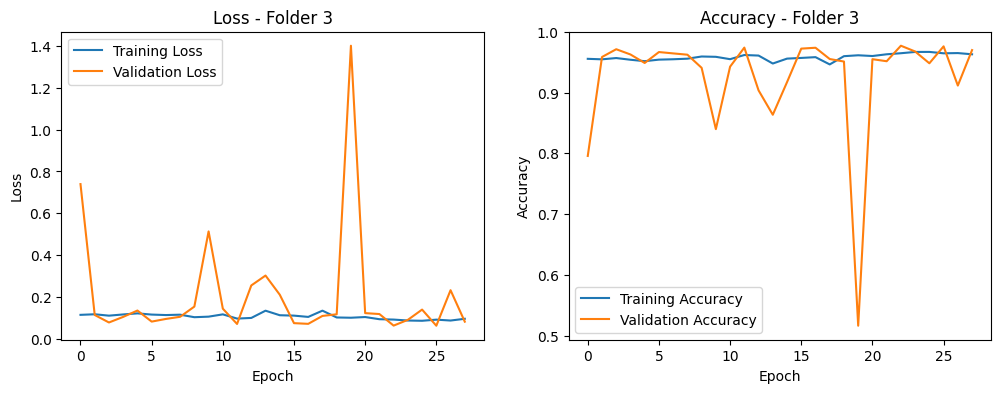

380/380 ━━━━━━━━━━━━━━━━━━━━ 66s 174ms/step


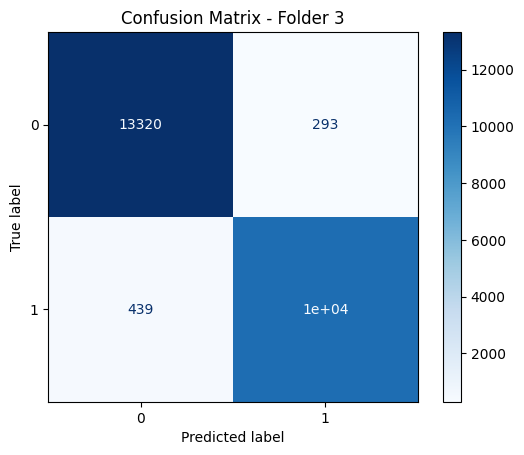

Classification Report - Folder 3:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     13613
           1       0.97      0.96      0.97     10685

    accuracy                           0.97     24298
   macro avg       0.97      0.97      0.97     24298
weighted avg       0.97      0.97      0.97     24298

Overall F1 Score - Folder 3: 0.9699
Overall Precision - Folder 3: 0.9699
Overall Recall - Folder 3: 0.9699


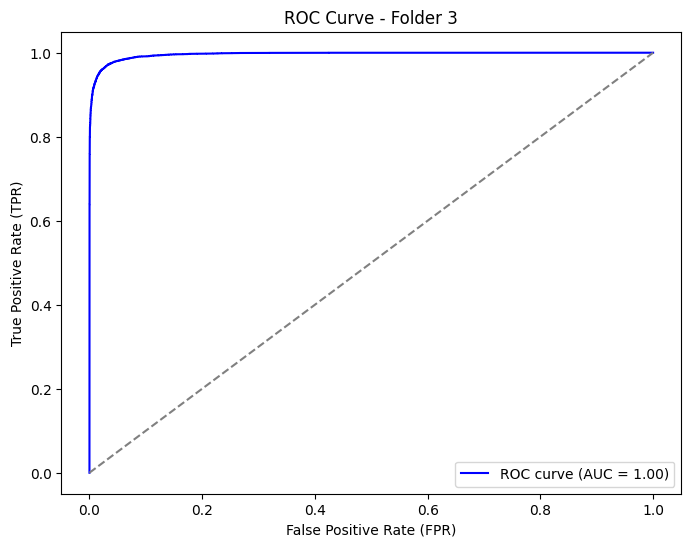

Equal Error Rate (EER) - Folder 3: 0.0307

Starting training on folder 4: /kaggle/input/spcup2025-train-4/Train_4
Real images: 42690, Fake images: 55970
Found 73995 validated image filenames belonging to 2 classes.
Found 24665 validated image filenames belonging to 2 classes.
Epoch 1/28
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 812s 699ms/step - accuracy: 0.9488 - loss: 0.1299 - val_accuracy: 0.9429 - val_loss: 0.1506
Epoch 2/28
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 310s 267ms/step - accuracy: 0.9548 - loss: 0.1137 - val_accuracy: 0.9613 - val_loss: 0.1120
Epoch 3/28
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 278s 239ms/step - accuracy: 0.9605 - loss: 0.1036 - val_accuracy: 0.8853 - val_loss: 0.3009
Epoch 4/28
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 276s 237ms/step - accuracy: 0.9614 - loss: 0.1021 - val_accuracy: 0.9718 - val_loss: 0.0775
Epoch 5/28
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 283s 244ms/step - accuracy: 0.9616 - loss: 0.0980 - val_accuracy: 0.9405 - val_loss: 0.1576
Epoch 6/28
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 289s 249ms/

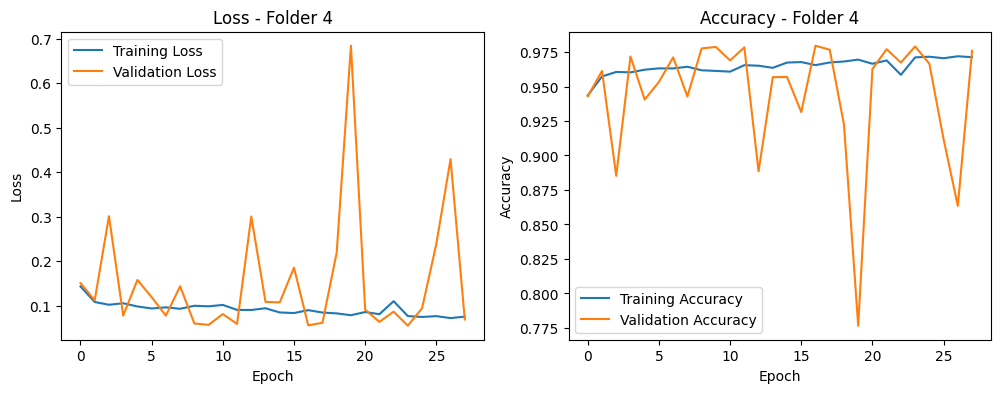

386/386 ━━━━━━━━━━━━━━━━━━━━ 69s 179ms/step


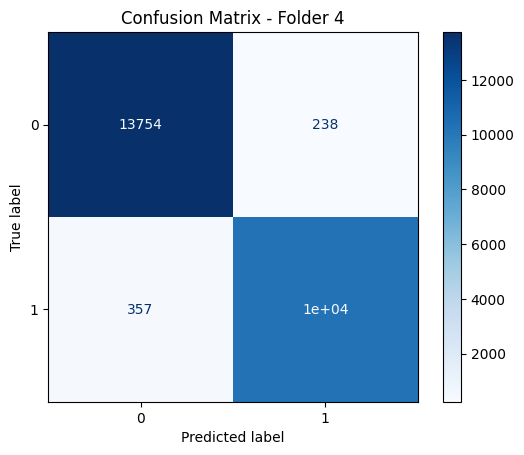

Classification Report - Folder 4:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     13992
           1       0.98      0.97      0.97     10673

    accuracy                           0.98     24665
   macro avg       0.98      0.97      0.98     24665
weighted avg       0.98      0.98      0.98     24665

Overall F1 Score - Folder 4: 0.9759
Overall Precision - Folder 4: 0.9759
Overall Recall - Folder 4: 0.9759


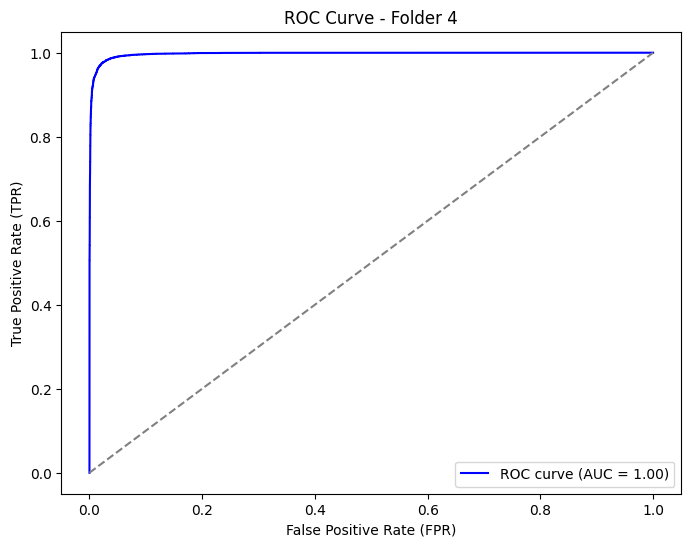

Equal Error Rate (EER) - Folder 4: 0.0234


In [6]:
# Training on each folder
for train_idx, train_path in enumerate(train_paths):
    print(f"\nStarting training on folder {train_idx + 1}: {train_path}")
    
    # Load data
    data = load_data(train_path)
    
    # Separate real and fake images
    real_images = [img for img, label in zip(data['image'], data['label']) if 'real' in label]
    fake_images = [img for img, label in zip(data['image'], data['label']) if 'fake' in label]
    
    print(f"Real images: {len(real_images)}, Fake images: {len(fake_images)}")
    
    # Combine real and fake images without augmentation
    images = real_images + fake_images
    labels = [1] * len(real_images) + [0] * len(fake_images)
    data = pd.DataFrame({'image': images, 'label': labels})

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        data['image'], data['label'], test_size=0.25, random_state=42
    )
    # Update dataset to ensure the image paths are strings
    train_data = pd.DataFrame({'image': X_train.astype(str), 'label': y_train.astype(str)})
    test_data = pd.DataFrame({'image': X_test.astype(str), 'label': y_test.astype(str)})

    # Data generators
    train_generator = datagen.flow_from_dataframe(
        train_data, x_col='image', y_col='label',
        target_size=image_size, batch_size=batch_size, class_mode='categorical', shuffle=True
    )
    test_generator = datagen.flow_from_dataframe(
        test_data, x_col='image', y_col='label',
        target_size=image_size, batch_size=batch_size, class_mode='categorical', shuffle=False
    )

    # Train model
    history = model.fit(
        train_generator, epochs=28, validation_data=test_generator, callbacks=[checkpoint]
    )

    # Plot loss and accuracy curves
    plt.figure(figsize=(12, 4))
    
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Loss - Folder {train_idx + 1}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Accuracy - Folder {train_idx + 1}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()
    
    # Predict on the test set
    test_predictions = model.predict(test_generator)
    y_pred = test_predictions.argmax(axis=1)
    y_true = test_generator.classes
    
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
    
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - Folder {train_idx + 1}")
    plt.show()

    # Classification report
    class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
    print(f"Classification Report - Folder {train_idx + 1}:\n", class_report)

    # Calculate overall metrics
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    print(f"Overall F1 Score - Folder {train_idx + 1}: {f1:.4f}")
    print(f"Overall Precision - Folder {train_idx + 1}: {precision:.4f}")
    print(f"Overall Recall - Folder {train_idx + 1}: {recall:.4f}")

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, test_predictions[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
    plt.title(f'ROC Curve - Folder {train_idx + 1}')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.show()

    # Calculate Equal Error Rate (EER)
    fnr = 1 - tpr
    eer_index = np.nanargmin(np.abs(fpr - fnr))  # Find the point where FPR equals FNR
    eer = fpr[eer_index]  # EER is the FPR at this point
    print(f"Equal Error Rate (EER) - Folder {train_idx + 1}: {eer:.4f}")


Found 3072 validated image filenames belonging to 2 classes.
48/48 ━━━━━━━━━━━━━━━━━━━━ 26s 553ms/step - accuracy: 0.9109 - loss: 0.2694
Test Loss: 0.4764063358306885
Test Accuracy: 0.8551432490348816
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step


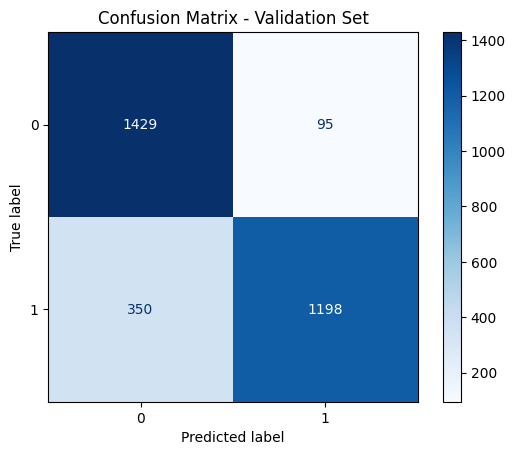

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.87      1524
           1       0.93      0.77      0.84      1548

    accuracy                           0.86      3072
   macro avg       0.86      0.86      0.85      3072
weighted avg       0.87      0.86      0.85      3072

Overall F1 Score: 0.8542
Overall Precision: 0.8654
Overall Recall: 0.8551


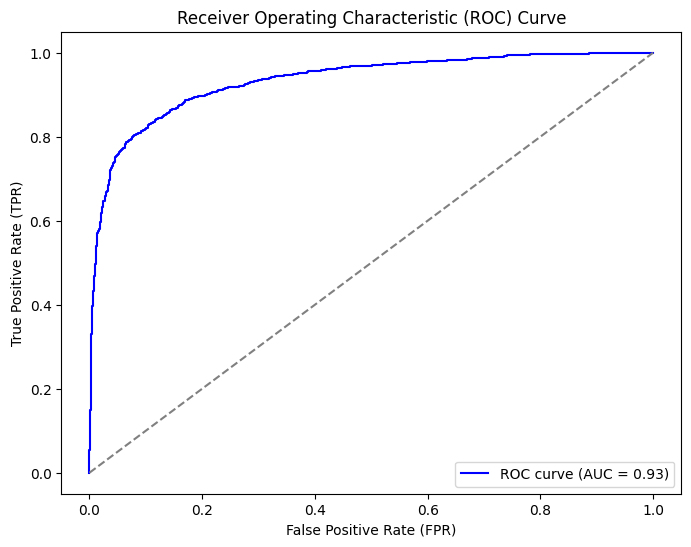

Equal Error Rate (EER): 0.1424


In [7]:
# Validation
validation_data = load_data(valid_path)

# Map and convert labels to strings
validation_data['label'] = validation_data['label'].map({'real': 1, 'fake': 0}).astype(str)

# Data generator for validation
valid_generator = datagen.flow_from_dataframe(
    validation_data, x_col='image', y_col='label',
    target_size=image_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

# Evaluate the model on the validation set
test_loss, test_accuracy = model.evaluate(valid_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict on the validation set
val_predictions = model.predict(valid_generator)
y_pred = val_predictions.argmax(axis=1)
y_true = valid_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=valid_generator.class_indices.keys())

# Display confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Validation Set")
plt.show()

# Generate classification report
class_report = classification_report(y_true, y_pred, target_names=valid_generator.class_indices.keys())
print("Classification Report:\n", class_report)

# Calculate overall metrics
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f"Overall F1 Score: {f1:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, val_predictions[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

# Calculate EER (Equal Error Rate)
fnr = 1 - tpr
eer_index = np.nanargmin(np.abs(fpr - fnr))  # Find the point where FPR equals FNR
eer = fpr[eer_index]  # EER is the FPR at this point
print(f"Equal Error Rate (EER): {eer:.4f}")


In [8]:
import os
import pandas as pd

# Define the validation paths
valid_fake_path = '/kaggle/input/spcup2025-valid-final/valid/fake'
valid_real_path = '/kaggle/input/spcup2025-valid-final/valid/real'

# Function to group images by file ID
def group_images_by_file_id(folder_path):
    file_groups = {}
    for img_file in os.listdir(folder_path):
        file_id = os.path.splitext(img_file)[0]  # Assuming file ID is the file name without extension
        file_path = os.path.join(folder_path, img_file)
        if file_id not in file_groups:
            file_groups[file_id] = []
        file_groups[file_id].append(file_path)
    return file_groups

# Group images from both real and fake folders
fake_images_group = group_images_by_file_id(valid_fake_path)
real_images_group = group_images_by_file_id(valid_real_path)

# Combine the groups into one dictionary
all_image_groups = {**fake_images_group, **real_images_group}


In [9]:
# Load and preprocess images for prediction
def preprocess_image(image_path):
    image = load_img(image_path, target_size=image_size)
    image = img_to_array(image) / 255.0  # Normalize the image
    return np.expand_dims(image, axis=0)

# Predict and score each file
predictions = {}
for file_id, image_paths in all_image_groups.items():
    scores = []
    for img_path in image_paths:
        img_array = preprocess_image(img_path)
        score = model.predict(img_array)[0][1]  # Assuming index 1 is for 'real' class
        scores.append(score)
    predictions[file_id] = np.mean(scores)  # Average score for all images in the file


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

In [10]:
# Save the predictions to a submission file
submission_file = "/kaggle/working/submission.txt"
with open(submission_file, "w") as f:
    for file_id, score in predictions.items():
        f.write(f"{file_id}\t{score}\n")

print(f"Predictions saved to {submission_file}")

Predictions saved to /kaggle/working/submission.txt
